# Keras model to classify Dog Breeds
This is a notebook that presents the use of Keras framework to classify 133 dog breeds with the use of a custom CNN model. This model has near 30% accuracy.

In [0]:
#Load and unzip dataset
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

### Load and view files

In [4]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load ordered list of dog names
dog_names = [item[25:-1] for item in glob('dogImages/train/*/')]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % str(len(train_files) + len(valid_files) + len(test_files)))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


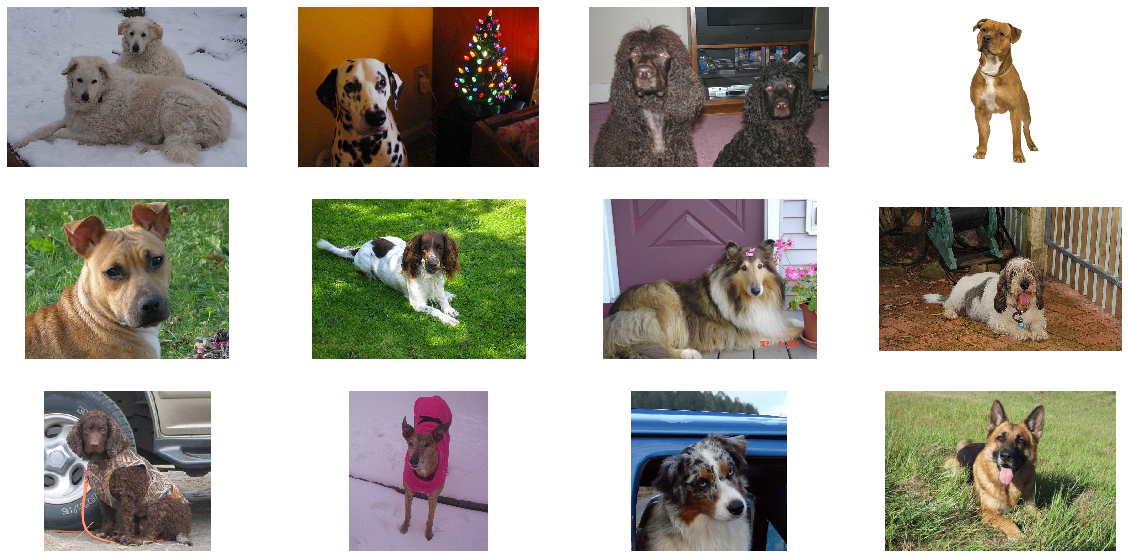

In [0]:
#Visualize the First 12 Training Images
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)


##Pre-process the Data
When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$
where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

The path_to_tensor function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN. The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels. Next, the image is converted to an array, which is then resized to a 4D tensor. In this case, since we are working with color images, each image has three channels. Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$
The paths_to_tensor function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape

$$
(\text{nb_samples}, 224, 224, 3).
$$
Here, nb_samples is the number of samples, or number of images, in the supplied array of image paths. It is best to think of nb_samples as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [0]:
from keras.preprocessing import image 
from tqdm import tqdm

#Method to process a single image
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    #img = preprocess_input(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

  #Method to process array of images
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


##More preprocessing
We rescale the images by dividing every pixel in every image by 255.

In [6]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
print (train_tensors.shape[1:])
print (type(train_tensors))

100%|██████████| 836/836 [00:07<00:00, 115.96it/s]


(224, 224, 3)
<class 'numpy.ndarray'>


### We create a custom CNN model

In [7]:

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dropout

model = Sequential()

### TODO: Define your architecture.

print (train_tensors.shape)
#model.add(Dropout(0.2, input_shape=(train_tensors.shape[1:])))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',input_shape=(train_tensors.shape[1:]) ))
model.add(MaxPooling2D(pool_size=3))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D(data_format=None))
#model.add(Dense(1024,activation ='relu'))
#model.add(Dropout(0.1))
model.add(Dense(512,activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(133, activation='softmax'))

model.summary()

(6680, 224, 224, 3)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        8256      
_________________________________________________________________
m

### We train the network

Instructions for updating:
Use tf.cast instead.
Train on 6680 samples, validate on 835 samples
Epoch 1/100
6680/6680 [==============================] - 20s 3ms/step - loss: 4.8839 - acc: 0.0093 - val_loss: 4.8697 - val_acc: 0.0120

Epoch 00001: val_loss improved from inf to 4.86968, saving model to dogvgg16.weights.best.hdf5
Epoch 2/100
6680/6680 [==============================] - 13s 2ms/step - loss: 4.8395 - acc: 0.0136 - val_loss: 4.7822 - val_acc: 0.0192

Epoch 00002: val_loss improved from 4.86968 to 4.78219, saving model to dogvgg16.weights.best.hdf5
Epoch 3/100
6680/6680 [==============================] - 13s 2ms/step - loss: 4.7520 - acc: 0.0187 - val_loss: 4.7264 - val_acc: 0.0156

Epoch 00003: val_loss improved from 4.78219 to 4.72642, saving model to dogvgg16.weights.best.hdf5
Epoch 4/100
6680/6680 [==============================] - 14s 2ms/step - loss: 4.6995 - acc: 0.0202 - val_loss: 4.7165 - val_acc: 0.0132

Epoch 00004: val_loss improved from 4.72642 to 4.71647, saving m

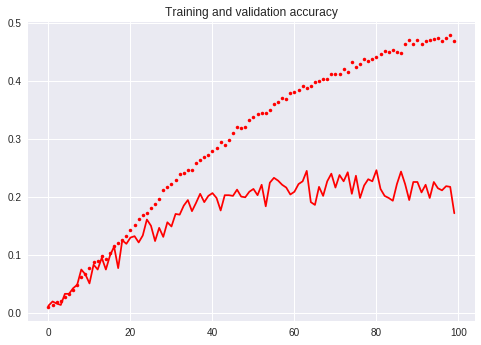

<Figure size 576x396 with 0 Axes>

In [8]:
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint  
import matplotlib.pyplot as plt

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

filepath="dogvgg16.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath='dogvgg16.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=100, batch_size=10, callbacks=[checkpoint], verbose=1)


# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()

    plt.savefig('acc_vs_epochs.png')
    
plot_training(history)

### Load the weights of the best model

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('dogvgg16.weights.best.hdf5')

### Check with test set

In [10]:
# get index of predicted dog breed for each image in test set
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in test_tensors]

print(test_tensors.shape)
# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==
                           np.argmax(test_targets, axis=1))/len(predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)

(836, 224, 224, 3)

Test accuracy: 19.3780%


### Save Keras model to Tensorflow

In [11]:
import os
import tensorflow as tf
import keras.backend as K

'Method for saving keras to tensorflow to a specific directory'
def keras_to_tensorflow(keras_model, output_dir, model_name,out_prefix="output_", log_tensorboard=True):

    if os.path.exists(output_dir) == False:
        os.mkdir(output_dir)

    out_nodes = []

    for i in range(len(keras_model.outputs)):
        out_nodes.append(out_prefix + str(i + 1))
        tf.identity(keras_model.output[i], out_prefix + str(i + 1))

    sess = K.get_session()

    from tensorflow.python.framework import graph_util, graph_io

    init_graph = sess.graph.as_graph_def()

    main_graph = graph_util.convert_variables_to_constants(sess, init_graph, out_nodes)

    graph_io.write_graph(main_graph, output_dir, name=model_name, as_text=False)

    if log_tensorboard:
        from tensorflow.python.tools import import_pb_to_tensorboard

        import_pb_to_tensorboard.import_to_tensorboard(
            os.path.join(output_dir, model_name),
            output_dir)
        
'Load weights'
model.load_weights('dogvgg16.weights.best.hdf5')

'Make directory'
output_dir = os.path.join(os.getcwd(),"checkpoint")

'Saving to Tensorflow'
keras_to_tensorflow(model,output_dir=output_dir,model_name="keras_dogs.pb")

print("Success!")

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.
Instructions for updating:
Use tf.gfile.GFile.
Model Imported. Visualize by running: tensorboard --logdir=/content/checkpoint
Success!


#Using Tensorboard to see graph. This is the [info](https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/)


In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-03-30 19:55:02--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.152.127.232, 35.172.177.65, 34.199.255.1, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.152.127.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.28M  65.6MB/s    in 0.2s    

2019-03-30 19:55:02 (65.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
#let's fire up the TensorBoard in the background like this:
LOG_DIR = 'checkpoint'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

### Click link to check graph to see the first input node name to replace that inside android project

In [0]:
#Then, we can run ngrok to tunnel TensorBoard port 6006 to the outside world. This command also runs in the background.
get_ipython().system_raw('./ngrok http 6006 &')
#One last step, we get the public URL where we can access the colab TensorBoard web page.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"
    
#Click genarated address to visualize graph of model and see the names of the input and output nodes to use them inside android app.

https://129937c9.ngrok.io
